In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [11]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [3]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            train_loss += loss
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    average_loss = train_loss / (size // 100 + 1)
    return average_loss

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    average_loss = test_loss / num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {average_loss:>8f} \n")

    return average_loss

In [4]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [12]:
import matplotlib.pyplot as plt

model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
test_loss_list = []

Epoch 1
-------------------------------
loss: 2.307848  [    0/60000]
loss: 0.628088  [ 6400/60000]
loss: 0.487711  [12800/60000]
loss: 0.555005  [19200/60000]
loss: 0.552631  [25600/60000]
loss: 0.481557  [32000/60000]
loss: 0.420695  [38400/60000]
loss: 0.530067  [44800/60000]
loss: 0.475335  [51200/60000]
loss: 0.497443  [57600/60000]
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.442865 

Epoch 2
-------------------------------
loss: 0.329152  [    0/60000]
loss: 0.368594  [ 6400/60000]
loss: 0.288697  [12800/60000]
loss: 0.409513  [19200/60000]
loss: 0.503449  [25600/60000]
loss: 0.374069  [32000/60000]
loss: 0.313727  [38400/60000]
loss: 0.489785  [44800/60000]
loss: 0.426126  [51200/60000]
loss: 0.455236  [57600/60000]
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.415306 

Epoch 3
-------------------------------
loss: 0.256824  [    0/60000]
loss: 0.326691  [ 6400/60000]
loss: 0.247164  [12800/60000]
loss: 0.290916  [19200/60000]
loss: 0.336712  [25600/60000]
loss: 0.326949  [32000/600

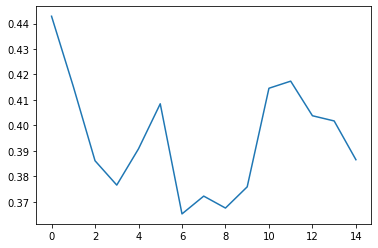

In [13]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_fn)
    test_loss_list.append(test_loss)
print("Done!")

plt.plot(test_loss_list)

1: Accuracy: 70.9%, Avg loss: 0.786802   
2: Accuracy: 65.2%, Avg loss: 0.926129   
3: Accuracy: 51.1%, Avg loss: 1.382120     
3-30: Accuracy: 77.0%, Avg loss: 0.632176   
2-30: Accuracy: 79.3%, Avg loss: 0.582462  
1-30: Accuracy: 80.9%, Avg loss: 0.546008 

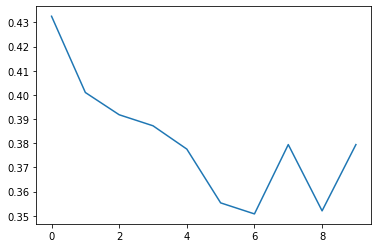

In [10]:
plt.plot(test_loss_list)

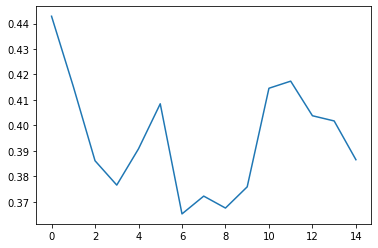

In [14]:
plt.plot(test_loss_list)